# Data Analytics with High Performance Computing - Practical 1
## Introduction to Python for Data Analytics

In DAwHPC we will adopt Python for our practical activities. IPython Notebooks offer an ideal platform for integrating block of code with text block written in Markdown.

IPython Notebooks can be read and interacted with in a number of packages. 

Here, we'll use Jupyter, which offers the classic Jupyter Notebook interface or the next-gen JupyterLab, which can be run locally or on remote servers under Windows, Linux or Mac OSX.
Another Jupyter package is JupyterHub, which provides a team environment for Jupyter Notebook or JupyterLab.

### Learning outcomes

This practical will cover introductory concepts you'll require for using Python for data analytics. This involves three packages:
*  the Pandas library, for data cleaning data preparation and data analysis
*  the NumPy library, which Pandas builds upon, for using numerical data in the form of NumPy arrays
*  the MatPlotLib library, a package used for general data visualisation in Python

### 1. Getting started

The first part of any Python script is the imports.

We'll import all of the packages we require, and by setting shorthands for these packages at the same time.

To run the block of code below, press <kbd>Ctrl</kbd>+<kbd>⏎ Enter</kbd> (Windows/Linux) or <kbd>⌘ CMD</kbd>+<kbd>⏎ Enter</kbd> (OSX) - you can also press <kbd>⇧ Shift</kbd>+<kbd>⏎ Enter</kbd> to run the block and move to the next block.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas provides two main objects: DataFrames and Series.

A DataFrame is an indexed table of rows an columns consisting of titles and data. These are referred to as the 'axes' of the DataFrame, where rows are axis = 0 and columns are axis = 1.

Each row and column is a Series object, which consists of data, in the form of a one-dimensional NumPy `ndarray` and an index, which can be provided as an array-like object or automatically generated by Pandas.

In [2]:
# Let's start by looking at a Pandas DataFrame
# DataFrames can be build in a number of ways - in this first example we'll use a Python Dictionary, or dict, object.
mydict = {'a': [1, 2, 3, 4], 'b': [2, 4, 6, 8], 'c': [3, 6, 9, 12], 'd': [4, 8, 12, 16]}
df1 = pd.DataFrame(data=mydict,index=['w', 'x', 'y', 'z'])
# Notice keys from mydict become column titles and values in the Python List object passed as the index become row names.
df1

,a,b,c,d
w,1,2,3,4
x,2,4,6,8
y,3,6,9,12
z,4,8,12,16


Some properties and attributes of the DataFrame:

In [3]:
print('Length:', len(df1)) # The in-built Python len() function gives the length of an array-like object. For multi-dimensional arrays, the length of axis 0 is given
print('Size:', df1.size) # The DataFrame.size attribute gives the number of elements in the DataFrame
print('Titles: ', df1.index, df1.columns) # Gives the NumPy ndarray objects whose values are row and column names
print('Datatypes:', df1.dtypes) # Gives the datatypes of each column

Length: 4
Size: 16
Titles:  Index(['w', 'x', 'y', 'z'], dtype='object') Index(['a', 'b', 'c', 'd'], dtype='object')
Datatypes: a    int64
b    int64
c    int64
d    int64
dtype: object


### 2. Selecting and retrieving data from DataFrame objects using indexing and location
The first level of retrieving data from a DataFrame is to pass a column name as a key, similarly to a Python dict.

In [4]:
df1['a']

w    1
x    2
y    3
z    4
Name: a, dtype: int64

In [5]:
mydict['a']

[1, 2, 3, 4]

Notice column 'a' of `df1` is a Pandas Series object, whereas the value corresponding to the key 'a' in `mydict` is a Python List object.

In [6]:
type(df1['a'])

pandas.core.series.Series

In [7]:
type(mydict['a'])

list

Note: row names (the `index`) cannot be used in this key-value way at the dataframe level, and so a KeyError exception is thrown

In [8]:
df1['w']

KeyError: 'w'

However, a row name can be passed to the Series object corresponding to a column:

In [9]:
# Either directly
print(df1['a']['w'])
# or by creating a new Series object
column_a = df1['a']
print(column_a['w'])

1
1


The next level is to use Pandas indexing.

Locating specific data in DataFrames can become tricky, and ambiguous. For this reason, Pandas provides four indexing functionalities to help (from Pandas documentation):
*  DataFrame.at  -  access a value given a row/column pair
*  DataFrame.iat -  access a value given a row/column pair using integer position
*  DataFrame.loc -  access a group of rows and columns by label(s) or a boolean array    
*  DataFrame.iloc -  purely integer-location based indexing for selection by position

In [10]:
df1.at['w','a'] # note the row is given first

1

In [11]:
df1.iat[0,0]

1

In [12]:
df1.loc[['w','y']]

,a,b,c,d
w,1,2,3,4
y,3,6,9,12


Lists can also be passed to `loc` or `iloc` to access more than one row:

In [13]:
df1.loc[['w','y']]

,a,b,c,d
w,1,2,3,4
y,3,6,9,12


Note that for DataFrame.loc the ambiguity of the (incorrect) `df['w']` is removed. This is because `loc` retrieves all column data for row 'w' and constructs a new Series object.

In [14]:
df1.iloc[1:3] # here using a slice meaning integer indices 1 <= i < 3

,a,b,c,d
x,2,4,6,8
y,3,6,9,12


### 3. Retrieving data using comparisons
A very useful way to fetch data from a DataFrame is by using a comparison function, which performs a boolean operation on the data before returning a DataFrame object corresponding to the result of that operation.

Let's have a look at this with a new DataFrame object.

In [15]:
df2 = pd.DataFrame(data = [np.add(np.arange(1,15),10),np.linspace(2000,10000,14),np.random.random(14)]).transpose()
df2

,0,1,2
0,11.0,2000.000000,0.697623
1,12.0,2615.384615,0.579245
2,13.0,3230.769231,0.438196
3,14.0,3846.153846,0.323995
4,15.0,4461.538462,0.552353
5,16.0,5076.923077,0.737306
6,17.0,5692.307692,0.302523
7,18.0,6307.692308,0.692058
8,19.0,6923.076923,0.751376
9,20.0,7538.461538,0.563376


Here we have instantiatied a DataFrame object using three NumPy arrays:

0. we generate an array with a range of 1 <= x < 15, then add 10 to each element in that array,
1. we generate an array containing 14 numbers linearly spaced with 2000 <= x <= 10000,
2. we generate an array of 14 random numbers with 0 <= x <= 1.

Finally, the function DataFrame.tranpose() is applied to swap rows and columns.

Notice without passing a value of `index` to the DataFrame constructor an integer index is generated, and column names are also integers. This is done automatically if `data` contains only numerical data.
This could get confusing, so let's set an index.

In [16]:
df2.columns = ['a','b','c']
df2

,a,b,c
0,11.0,2000.000000,0.697623
1,12.0,2615.384615,0.579245
2,13.0,3230.769231,0.438196
3,14.0,3846.153846,0.323995
4,15.0,4461.538462,0.552353
5,16.0,5076.923077,0.737306
6,17.0,5692.307692,0.302523
7,18.0,6307.692308,0.692058
8,19.0,6923.076923,0.751376
9,20.0,7538.461538,0.563376


DataFrame.where() and Series.where() allow conditional retrieval of data:

In [17]:
#Return the whole DataFrame with a single condition
df2.where(df2 < 16)

,a,b,c
0,11.0,NaN,0.697623
1,12.0,NaN,0.579245
2,13.0,NaN,0.438196
3,14.0,NaN,0.323995
4,15.0,NaN,0.552353
5,NaN,NaN,0.737306
6,NaN,NaN,0.302523
7,NaN,NaN,0.692058
8,NaN,NaN,0.751376
9,NaN,NaN,0.563376


In [18]:
#Return a boolean a Series, also known as a Pandas `mask`
df2.loc[:]['a'] < 16 ## [:] means "all rows"

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: a, dtype: bool

In [19]:
#Return a DataFrame given a condition (notice the condition in the mask shown above)
df2.where(df2.loc[:]['a'] < 16) ## [:] means "all rows"

,a,b,c
0,11.0,2000.000000,0.697623
1,12.0,2615.384615,0.579245
2,13.0,3230.769231,0.438196
3,14.0,3846.153846,0.323995
4,15.0,4461.538462,0.552353
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


Or equivalently, a Pandas `query`, which uses a string for the whole condition

In [20]:
df2.query("a < 16")

,a,b,c
0,11.0,2000.000000,0.697623
1,12.0,2615.384615,0.579245
2,13.0,3230.769231,0.438196
3,14.0,3846.153846,0.323995
4,15.0,4461.538462,0.552353


### 4. Performing arithmetic operations
Like the NumPy arrays from which they are constructed, Pandas Dataframes and Series can undergo whole-object operations. A few are demonstrated here.

In [21]:
#Recall df1
df1

,a,b,c,d
w,1,2,3,4
x,2,4,6,8
y,3,6,9,12
z,4,8,12,16


In [22]:
df1.add(3)

,a,b,c,d
w,4,5,6,7
x,5,7,9,11
y,6,9,12,15
z,7,11,15,19


In [23]:
df1.mul(2)

,a,b,c,d
w,2,4,6,8
x,4,8,12,16
y,6,12,18,24
z,8,16,24,32


In [24]:
df1.mod(2)

,a,b,c,d
w,1,0,1,0
x,0,0,0,0
y,1,0,1,0
z,0,0,0,0


In [25]:
#Combining operations with DataFrame.where()
df1.where(df1.mod(2) == 0)

,a,b,c,d
w,NaN,2,NaN,4
x,2.0,4,6.0,8
y,NaN,6,NaN,12
z,4.0,8,12.0,16


In [26]:
#Combining Pandas and NumPy operations with DataFrame.where()
#Find entries that are perfect squares
df1.where(np.sqrt(df1).mod(1) == 0)

,a,b,c,d
w,1.0,NaN,NaN,4.0
x,NaN,4.0,NaN,NaN
y,NaN,NaN,9.0,NaN
z,4.0,NaN,NaN,16.0


### 5. Aggregating and Grouping
Pandas allows us to aggregate (or agg for short) data along a chosen axis according to one or more operation.

In [27]:
df1.agg('sum')

a    10
b    20
c    30
d    40
dtype: int64

In [28]:
df1.agg('sum',axis=1)

w    10
x    20
y    30
z    40
dtype: int64

In [29]:
df1.agg(['sum','mean','min'])

,a,b,c,d
sum,10.0,20.0,30.0,40.0
mean,2.5,5.0,7.5,10.0
min,1.0,2.0,3.0,4.0


Grouping of rows with the same value in a given column is very useful.
`DataFrame.groupby()` performs this operation.

In [30]:
# First, we'll create a new DataFrame containing copies of df1 and df1*2.
# Note we now have repeated values in columns and repeated index values
df3 = pd.concat([df1,df1.mul(2)])
df3

,a,b,c,d
w,1,2,3,4
x,2,4,6,8
y,3,6,9,12
z,4,8,12,16
w,2,4,6,8
x,4,8,12,16
y,6,12,18,24
z,8,16,24,32


In [31]:
# `level=0` groups by index
# We must pass an operation by which to group values.
df3.groupby(level=0).sum()

,a,b,c,d
w,3,6,9,12
x,6,12,18,24
y,9,18,27,36
z,12,24,36,48


In [32]:
# Grouping by a column drops that column and reindexes by that column
# Here we group by common values on column 'b', assigning the mean of grouped values.
df3.groupby(by=['b']).mean()

,a,c,d
b,,,
2,1,3,4
4,2,6,8
6,3,9,12
8,4,12,16
12,6,18,24
16,8,24,32


### 6. Plotting data (from dataframes)

Recall we ran `import matplotlib.pyplot as plt`

We will now use this package to plot some data.
Matplotlib is vast an powerful. Here we will attempt to scratch the surface.

At the simplest level, the pyplot API can be used.

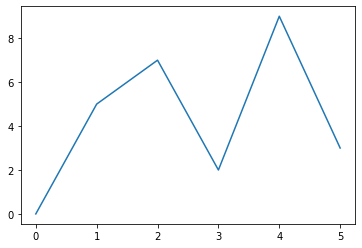

In [33]:
#plt.plot() produces a 2-D line plot
plt.plot([0,5,7,2,9,3]) # plot numbers from a 1-D Python List

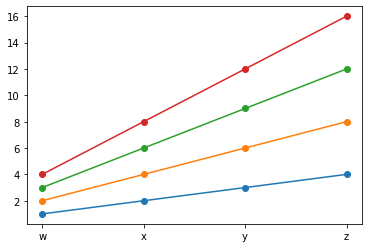

In [34]:
#If we provide a Pandas Dataframe, a line is plotted for each row
plt.plot(df1,marker='o')

For more in-depth plots, it's better to use pyplot in an object-oriented sense.

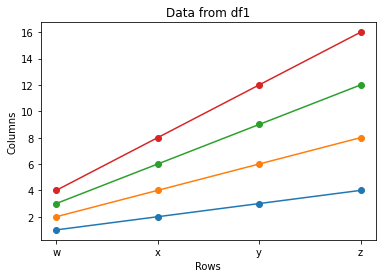

In [35]:
fig, ax = plt.subplots() # Create a Figure object, which contains a singe Axes object
ax.plot(df1,marker='o') # Create a plot on the Axes object
ax.set_xlabel('Rows')
ax.set_ylabel('Columns')
ax.set_title('Data from df1')
plt.show()

<class 'numpy.ndarray'>


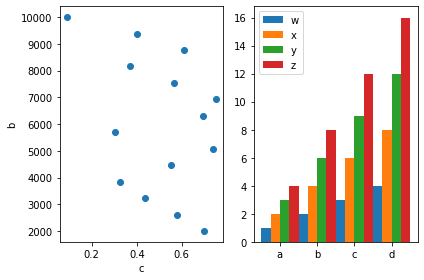

In [36]:
fig, axs = plt.subplots(1,2) # Create a figure with two axes arranged in 1 row and 2 columns
#axs is an array of Axes objects
print(type(axs))
##Create a scatter plot of column 'b' versus column 'c' from df2
axs[0].scatter(df2.loc[:]['c'],df2.loc[:]['b'])
axs[0].set_xlabel('c')
axs[0].set_ylabel('b')

##Create a multi-label bar chart from df1
#Number of series = number of columns
series = len(df1.keys())
#x positions of bars
xpos = np.arange(series)
#Loop over number of series and create a bar chart for each one
for i in range(series):
    ## adjust the positions and widths of bars so that they do not overlap
    ## use DataFrame.iloc to get data from rows
    ## df1.keys()[i] provides the series names
    ## label with row names
    axs[1].bar(xpos+(i-series/2)/series,df1.iloc[i],label=df1.index[i],width=1/series)
    ## create and position x-ticks, label with column names
    plt.xticks(xpos-1/(2*series),df1.keys())
##add a basic legend (uses label values from bar charts within last accessed Axes object)
plt.legend()
##neaten up and white space
plt.tight_layout()
plt.show()